# **Autoencoders for compression of MRI Brain Images**

**1. Import the Required Libraries & Load the Image Data**

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D, Dense, UpSampling2D, Flatten, Reshape
from tensorflow.keras.datasets.fashion_mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.10.0'

In [4]:
data_path = '/home/JGY/mri_cnn/Brain-Tumor-Classification-DataSet/Training'
os.listdir('/home/JGY/mri_cnn/Brain-Tumor-Classification-DataSet/Training')

['meningioma_tumor', 'glioma_tumor', 'pituitary_tumor', 'no_tumor']

In [5]:
os.path.join(data_path, 'pituitary_tumor')

'/home/JGY/mri_cnn/Brain-Tumor-Classification-DataSet/Training/pituitary_tumor'

In [6]:
data_path = '/home/JGY/mri_cnn/Brain-Tumor-Classification-DataSet/Training'

# Create an empty list to store the data
data = []
# Loop over the directories in the DATA directory
for dir_name in os.listdir(data_path):
    # Loop over the image files in the directory
    for file_name in os.listdir(os.path.join(data_path, dir_name)):
        if file_name.endswith('.jpg'):
            # Get the path to the image file
            img_path = os.path.join(data_path, dir_name, file_name)
            # Get the class name from the directory name
            class_name = dir_name
            # Add the image path and class name to the data list
            data.append((img_path, class_name))

# Convert the data list to a Pandas DataFrame
df = pd.DataFrame(data, columns=['image_path', 'class_name'])
df.head(), df.shape, sorted(df['class_name'].unique()), df['class_name'].nunique()

(                                          image_path        class_name
 0  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 1  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 2  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 3  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 4  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor,
 (2870, 2),
 ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
 4)

In [7]:
data_path = '/home/JGY/mri_cnn/Brain-Tumor-Classification-DataSet/Testing'

# Create an empty list to store the data
data = []
# Loop over the directories in the DATA directory
for dir_name in os.listdir(data_path):
    # Loop over the image files in the directory
    for file_name in os.listdir(os.path.join(data_path, dir_name)):
        if file_name.endswith('.jpg'):
            # Get the path to the image file
            img_path = os.path.join(data_path, dir_name, file_name)
            # Get the class name from the directory name
            class_name = dir_name
            # Add the image path and class name to the data list
            data.append((img_path, class_name))

# Convert the data list to a Pandas DataFrame
df_test = pd.DataFrame(data, columns=['image_path', 'class_name'])
df_test.head(), df_test.shape

(                                          image_path        class_name
 0  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 1  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 2  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 3  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor
 4  /home/JGY/mri_cnn/Brain-Tumor-Classification-D...  meningioma_tumor,
 (394, 2))

## **2. Pre-processing & Visualizing the images**

validation 추가로 수정

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image

X = df['image_path']
y_train = df['class_name']

X_train = []
for path in X:
    img = Image.open(path)
    #img = img.convert('L')
    img = img.resize((80, 80))
    img = np.array(img)
    X_train.append(img)
X_train = np.array(X_train)

# X_train과 y_train을 80-20 비율로 분리
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)


Train set: (2296, 80, 80, 3) (2296,)
Validation set: (574, 80, 80, 3) (574,)


In [10]:
y_test = df_test['class_name']
X_test = []
for path in df_test['image_path']:
    img = Image.open(path)
    #img = img.convert('L')
    img = img.resize((80, 80))  # resize to desired shape
    img = np.array(img)  # convert to numpy array
    X_test.append(img)
X_test = np.array(X_test)  # convert list of images to numpy array
X_test.shape, y_test.shape

((394, 80, 80, 3), (394,))

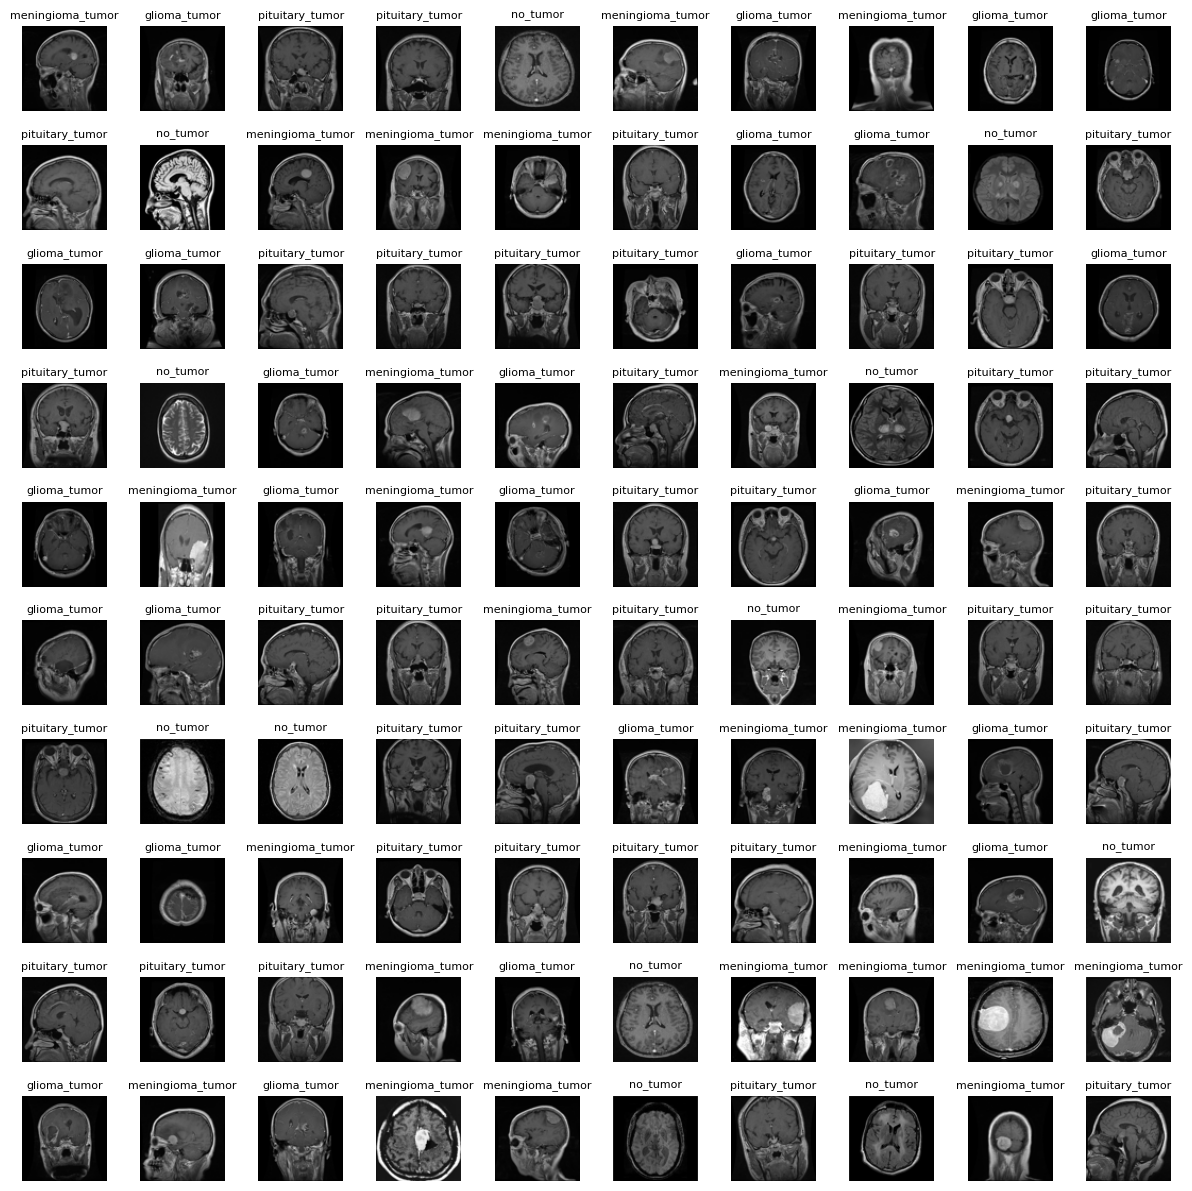

In [11]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 2296)   #2870
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train.iloc[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

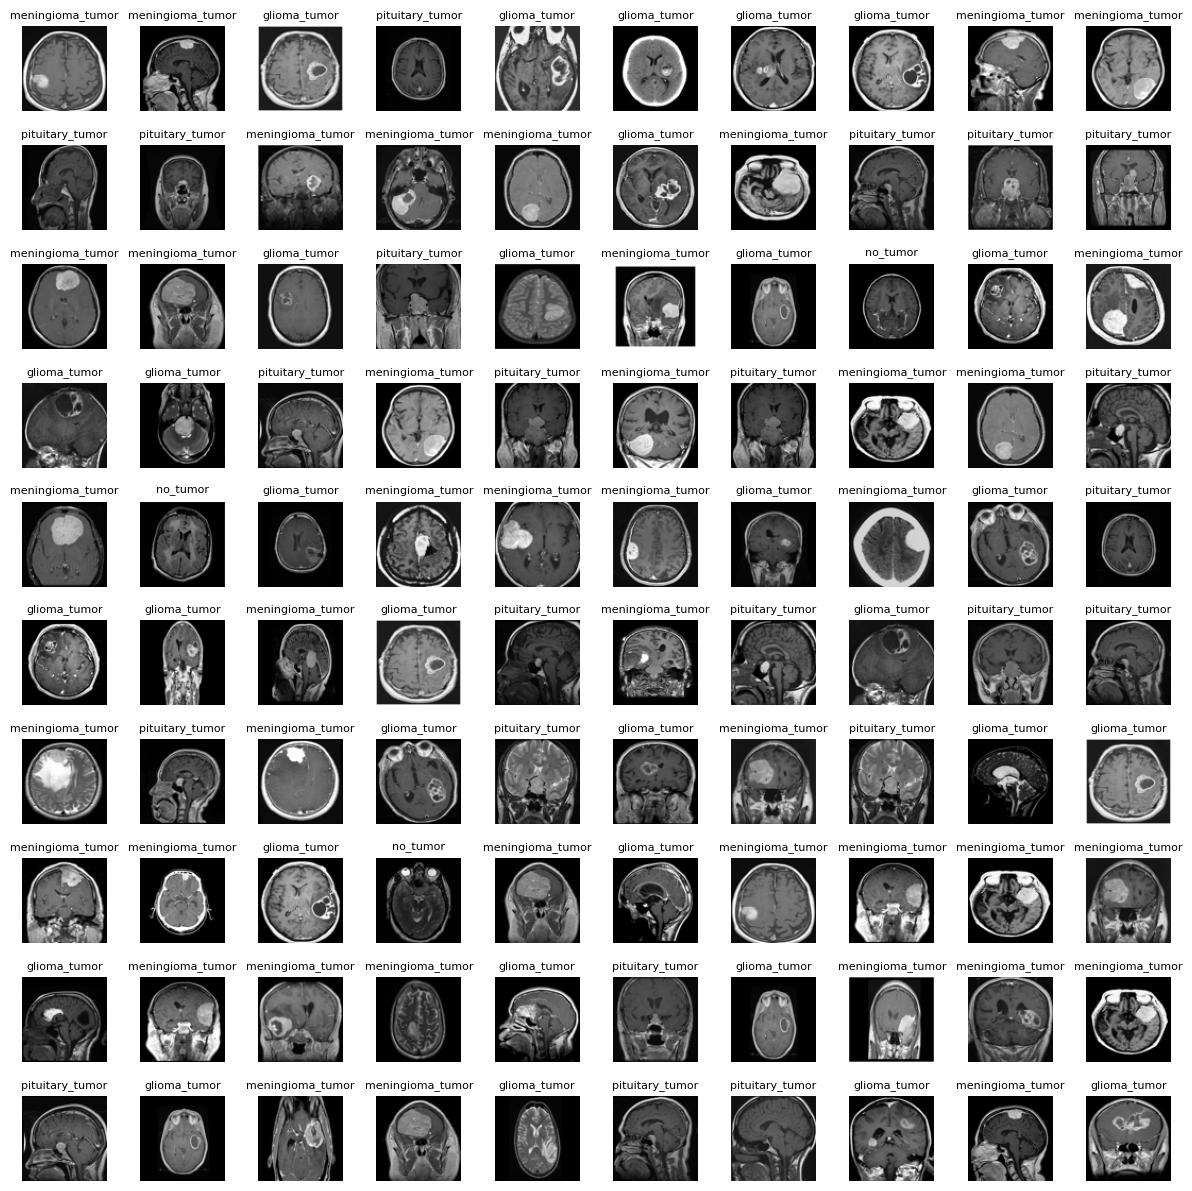

In [12]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 300)
    axes[i].imshow(X_test[index], cmap = 'gray' )
    axes[i].set_title(y_test[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [13]:
X_trains = X_train / np.max(X_train)
X_tests = X_test / np.max(X_train)
X_vals = X_val/np.max(X_train)
X_tests[0].min(), X_tests[0].max()


(0.0, 0.9725490196078431)

In [14]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("GPU is available:", tf.config.list_physical_devices('GPU'))


TensorFlow Version: 2.10.0
GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **3. Model .ver2**

In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

# 입력 정의 (예: 80x80x3 이미지)
input_img = Input(shape=(80, 80, 3))

# --- Encoder ---
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)#
x = BatchNormalization()(x)#
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)#
x = BatchNormalization()(x)#
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = BatchNormalization()(encoded)
#encoded =  MaxPooling2D((2, 2))(encoded)  #뭔가 이상

# --- Decoder ---
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)#
x = BatchNormalization()(x)#
x = UpSampling2D((2, 2))(x)
x = Dropout(0.1)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)#
x = BatchNormalization()(x)#
x = UpSampling2D((2, 2))(x)
x = Dropout(0.1)(x)
decoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (1, 1), activation='sigmoid', padding='same')(decoded)  #이상해서 수정

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
# 비지도 reconstruction 학습
#autoencoder.fit(X_trains, X_trains, epochs=100, batch_size=32)
autoencoder.fit(X_trains, X_trains, epochs=120, batch_size=4, validation_data=(X_vals, X_vals))



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 80, 80, 128)       3584      
                                                                 
 batch_normalization_14 (Bat  (None, 80, 80, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 80, 80, 128)       147584    
                                                                 
 batch_normalization_15 (Bat  (None, 80, 80, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 80, 80, 128)       1475

2025-11-05 14:59:53.409746: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907
2025-11-05 14:59:53.565191: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


574/574 [==============================] - 5s 7ms/step - loss: 0.0078 - val_loss: 0.0100
Epoch 2/120
574/574 [==============================] - 4s 7ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 3/120
574/574 [==============================] - 5s 8ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 4/120
574/574 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 5/120
574/574 [==============================] - 4s 8ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 6/120
574/574 [==============================] - 5s 8ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 7/120
574/574 [==============================] - 4s 6ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 8/120
574/574 [==============================] - 3s 6ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/120
574/574 [==============================] - 3s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/120
574/574 [==============================] - 4s 7ms/step - loss: 0.0019 - val_loss: 0.0012
E

### argument data 

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,           # 0~90도 사이 랜덤 회전
    horizontal_flip=True,        # 좌우반전 허용
    vertical_flip=True           # 상하반전 허용
)

autoencoder_train_generator = datagen.flow(
    X_trains, X_trains,  # 이미지와 레이블(one-hot)
    batch_size=32
)


def simple_gen():
    for data, labels in autoencoder_train_generator:
        labels[:] = data
        yield data, labels


# Autoencoder 학습 시 generator 사용 예 (input = output)
autoencoder.fit(
    simple_gen(),
    epochs=250,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_vals,X_vals)
)



Epoch 1/250
71/71 [==============================] - 5s 52ms/step - loss: 2.9657e-04 - val_loss: 4.3207e-04
Epoch 2/250
71/71 [==============================] - 4s 48ms/step - loss: 2.7792e-04 - val_loss: 3.7884e-04
Epoch 3/250
71/71 [==============================] - 3s 48ms/step - loss: 2.7736e-04 - val_loss: 3.7613e-04
Epoch 4/250
71/71 [==============================] - 3s 48ms/step - loss: 2.7398e-04 - val_loss: 3.6541e-04
Epoch 5/250
71/71 [==============================] - 3s 48ms/step - loss: 2.7052e-04 - val_loss: 3.6079e-04
Epoch 6/250
71/71 [==============================] - 3s 48ms/step - loss: 2.7049e-04 - val_loss: 3.6254e-04
Epoch 7/250
71/71 [==============================] - 3s 48ms/step - loss: 2.6605e-04 - val_loss: 3.5576e-04
Epoch 8/250
71/71 [==============================] - 3s 48ms/step - loss: 2.6874e-04 - val_loss: 3.5763e-04
Epoch 9/250
71/71 [==============================] - 3s 48ms/step - loss: 2.6137e-04 - val_loss: 3.5372e-04
Epoch 10/250
71/71 [========

In [21]:
# Encoder 부분만 떼어서 새로운 모델로 생성
encoder_model = Model(inputs=input_img, outputs=encoded)


In [24]:
import numpy as np

# 이미지 배열과 레이블 리스트를 준비한 상태에서
X_trains = np.array(X_trains)
y_train = np.array(y_train)

# 이미지와 레이블을 동일한 인덱스로 섞기 위한 인덱스 생성
indices = np.arange(len(X_trains))
np.random.shuffle(indices)

# 인덱스에 따라 데이터와 레이블 섞기
X_trains = X_trains[indices]
y_train = y_train[indices]
print(y_train)

['pituitary_tumor' 'no_tumor' 'pituitary_tumor' ... 'pituitary_tumor'
 'pituitary_tumor' 'pituitary_tumor']


In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 예: y_train = ['glioma_tumor', 'pituitary_tumor', ...] (길이 2870)

# 1. 문자열 레이블을 정수 인코딩 (0~3)
label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y_train)
y_val_int = label_encoder.transform(y_val)
y_test_int = label_encoder.fit_transform(y_test)

# 2. 정수 레이블을 one-hot 인코딩
y_onehot = to_categorical(y_int, num_classes=4)
y_val_onehot = to_categorical(y_val_int, num_classes=4)

print(y_onehot.shape)  # (2870, 4)
print(y_onehot[0])     # 첫 번째 샘플의 one-hot 벡터 출력


# Encoder 출력(feature map)을 분류기 입력으로 사용
#flat = Flatten()(encoder_model.output)
#fc = Dense(64, activation='relu')(flat)
#out = Dense(4, activation='softmax')(fc)  # 종양 종류 4개 클래스

#classifier = Model(inputs=input_img, outputs=out)
#classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 지도 classification 학습 (y_train은 one-hot label)
#classifier.fit(X_trains, y_onehot, epochs=20, batch_size=32)
#classifier.summary()

from tensorflow.keras.layers import BatchNormalization, Dropout

clas1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder_model.output)
clas2 = Conv2D(64, (3, 3), activation='relu', padding='same')(clas1)
bn_clas = BatchNormalization()(clas2)
Maxpool_clas =  MaxPooling2D((2, 2))(bn_clas)
drop_clas = Dropout(0.1)(Maxpool_clas)
flat_clas = Flatten()(drop_clas)
#drop1 = Dropout(0.3)(bn1)
#fc2 = Dense(32, activation='relu')(drop1)
out = Dense(4, activation='softmax')(flat_clas)

classifier = Model(inputs=input_img, outputs=out)
# 1. encoder 가중치 freeze
for layer in encoder_model.layers:
    layer.trainable = False

classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

classifier.fit(X_trains, y_onehot, epochs=80, batch_size=16, validation_data=(X_vals,y_val_onehot))




(2296, 4)
[1. 0. 0. 0.]
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 80, 80, 128)       3584      
                                                                 
 batch_normalization_14 (Bat  (None, 80, 80, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 80, 80, 128)       147584    
                                                                 
 batch_normalization_15 (Bat  (None, 80, 80, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None,

### data argument

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

label_encoder = LabelEncoder()
y_int = label_encoder.fit_transform(y_train)
y_val_int = label_encoder.transform(y_val)
y_test_int = label_encoder.fit_transform(y_test)

# 2. 정수 레이블을 one-hot 인코딩
y_onehot = to_categorical(y_int, num_classes=4)
y_val_onehot = to_categorical(y_val_int, num_classes=4)



datagen = ImageDataGenerator(
    rotation_range=15,           # 0~90도 사이 랜덤 회전
    horizontal_flip=False,        # 좌우반전 
    vertical_flip=True           # 상하반전 
)

classifier_train_generator = datagen.flow(
    X_trains, y_onehot,  # 이미지와 레이블(one-hot)
    batch_size=64
)



# 분류기 학습 시 generator 사용 예
classifier.fit(
    classifier_train_generator,
    epochs=200,
    steps_per_epoch=len(X_trains) // 64,
    validation_data=(X_vals,y_val_onehot)
)

Epoch 1/200
35/35 [==============================] - 2s 50ms/step - loss: 1.7392 - accuracy: 0.7352 - val_loss: 3.7465 - val_accuracy: 0.6254
Epoch 2/200
35/35 [==============================] - 1s 42ms/step - loss: 0.8190 - accuracy: 0.8060 - val_loss: 3.6087 - val_accuracy: 0.6551
Epoch 3/200
35/35 [==============================] - 1s 42ms/step - loss: 0.5996 - accuracy: 0.8414 - val_loss: 1.7101 - val_accuracy: 0.7352
Epoch 4/200
35/35 [==============================] - 1s 42ms/step - loss: 0.5790 - accuracy: 0.8356 - val_loss: 1.2153 - val_accuracy: 0.8101
Epoch 5/200
35/35 [==============================] - 1s 42ms/step - loss: 0.4417 - accuracy: 0.8629 - val_loss: 1.0152 - val_accuracy: 0.8223
Epoch 6/200
35/35 [==============================] - 1s 42ms/step - loss: 0.4012 - accuracy: 0.8777 - val_loss: 0.7456 - val_accuracy: 0.8484
Epoch 7/200
35/35 [==============================] - 1s 42ms/step - loss: 0.3846 - accuracy: 0.8786 - val_loss: 0.7077 - val_accuracy: 0.8624
Epoch 

## **Encoding and decoding the test images**

In [27]:
decoded_test_images = autoencoder.predict(X_tests)
decoded_test_images.shape
#print(decoded_test_images)


13/13 [==============================] - 0s 11ms/step


(394, 80, 80, 1)

13/13 [==============================] - 0s 11ms/step


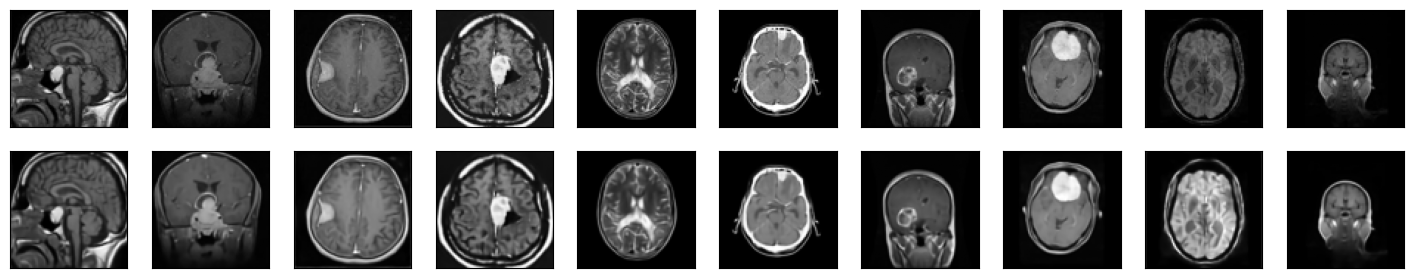

In [28]:
decoded_test_images = autoencoder.predict(X_tests)

n_images = 10
test_images = np.random.randint(0, X_tests.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_tests[image_index],cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  #ax = plt.subplot(10,10, i + 1 + n_images)
  #plt.imshow(coded_test_images[image_index].reshape(196,128), cmap='gray')
  #plt.xticks(())
  #plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images )
  plt.imshow(decoded_test_images[image_index],cmap='gray')
  plt.xticks(())
  plt.yticks(())
  

CAM : 
data 맞추고, 
freeze , fine - tune 
CAM both - activaition map.
kernel 3x3

##  **Encoder and FC Test**

In [78]:
print(y_test.shape)
print(y_test)
print(X_tests.shape)

(394,)
0      meningioma_tumor
1      meningioma_tumor
2      meningioma_tumor
3      meningioma_tumor
4      meningioma_tumor
             ...       
389            no_tumor
390            no_tumor
391            no_tumor
392            no_tumor
393            no_tumor
Name: class_name, Length: 394, dtype: object
(394, 80, 80, 3)


meningioma_tumor : '1'
glioma_tumor : '0'
pituitary_tumor: '3'
no_tumor : '2'

overfit to class '1' ,'2'

In [93]:
print(y_val[:5])
print(label_encoder.fit_transform(y_val)[:5])
print(y_test[1],y_test[130], y_test[250], y_test[340])
print(label_encoder.fit_transform(y_test)[1],label_encoder.fit_transform(y_test)[130],label_encoder.fit_transform(y_test)[250],label_encoder.fit_transform(y_test)[340])

624     meningioma_tumor
2482            no_tumor
1368        glioma_tumor
517     meningioma_tumor
1095        glioma_tumor
Name: class_name, dtype: object
[1 2 0 1 0]
meningioma_tumor glioma_tumor pituitary_tumor no_tumor
1 0 3 2


In [23]:
# y_test int-encoding
#label_encoder = LabelEncoder()
y_test_int = label_encoder.fit_transform(y_test)

# predict
y_pred_prob = classifier.predict(X_tests)  # 클래스별 확률 출력 (num_samples, 4)
y_pred = y_pred_prob.argmax(axis=1)       # 가장 높은 확률 클래스로 변환 (정수 인코딩)


# eval
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test_int, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# classification report
print(classification_report(y_test_int, y_pred, target_names=label_encoder.classes_))

# confusion matrix(선택사항)
cm = confusion_matrix(y_test_int, y_pred)
print("Confusion Matrix:")
print(cm)


13/13 [==============================] - 0s 7ms/step
Test Accuracy: 0.6853
                  precision    recall  f1-score   support

    glioma_tumor       0.86      0.19      0.31       100
meningioma_tumor       0.65      0.87      0.74       115
        no_tumor       0.63      0.99      0.77       105
 pituitary_tumor       0.90      0.64      0.75        74

        accuracy                           0.69       394
       macro avg       0.76      0.67      0.64       394
    weighted avg       0.75      0.69      0.64       394

Confusion Matrix:
[[ 19  37  41   3]
 [  0 100  13   2]
 [  0   1 104   0]
 [  3  17   7  47]]


no tumor , meningoma_tumor 로 흡수되는 구조

In [29]:
# y_test int-encoding
label_encoder = LabelEncoder()
y_test_int = label_encoder.fit_transform(y_test)

# predict
y_pred_prob = classifier.predict(X_tests)  # 클래스별 확률 출력 (num_samples, 4)
y_pred = y_pred_prob.argmax(axis=1)       # 가장 높은 확률 클래스로 변환 (정수 인코딩)


# eval
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test_int, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# classification report
print(classification_report(y_test_int, y_pred, target_names=label_encoder.classes_))

# confusion matrix(선택사항)
cm = confusion_matrix(y_test_int, y_pred)
print("Confusion Matrix:")
print(cm)

13/13 [==============================] - 0s 7ms/step
Test Accuracy: 0.7056
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.17      0.29       100
meningioma_tumor       0.71      0.90      0.79       115
        no_tumor       0.62      0.98      0.76       105
 pituitary_tumor       0.86      0.73      0.79        74

        accuracy                           0.71       394
       macro avg       0.80      0.70      0.66       394
    weighted avg       0.79      0.71      0.66       394

Confusion Matrix:
[[ 17  37  40   6]
 [  0 104   8   3]
 [  0   2 103   0]
 [  0   4  16  54]]
